<font color="Yellow" Size="6">Random Forest </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [5]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

In [6]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

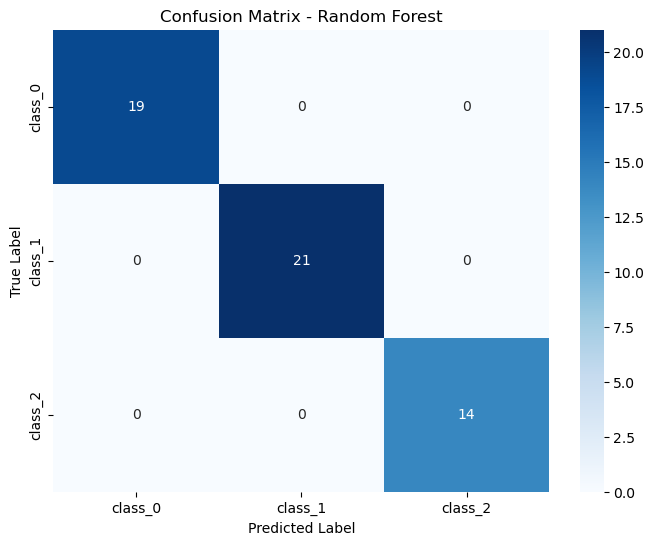

In [7]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [8]:
# Feature importance analysis
importances = rf_clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

In [9]:
# Display feature importances
print("Feature Importances:")
for i in sorted_indices:
    print(f"{wine.feature_names[i]}: {importances[i]:.4f}")

Feature Importances:
color_intensity: 0.1802
flavanoids: 0.1659
alcohol: 0.1420
proline: 0.1261
od280/od315_of_diluted_wines: 0.0960
hue: 0.0860
total_phenols: 0.0598
magnesium: 0.0347
alcalinity_of_ash: 0.0332
proanthocyanins: 0.0298
malic_acid: 0.0290
ash: 0.0119
nonflavanoid_phenols: 0.0055


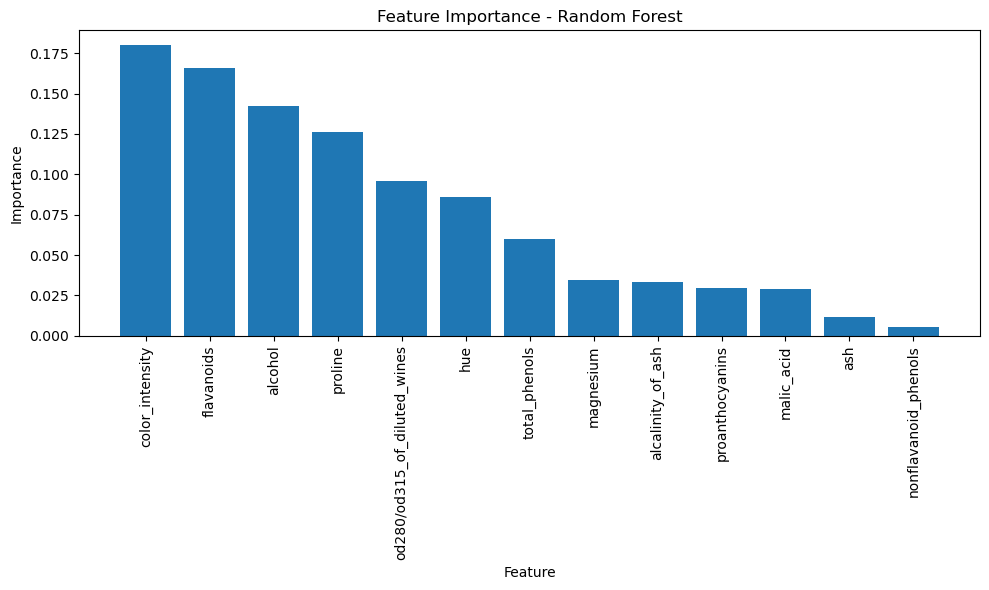

In [10]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align='center')
plt.xticks(range(len(importances)), [wine.feature_names[i] for i in sorted_indices], rotation=90)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [11]:
# Predict for a new instance
new_instance = [[13.5, 1.2, 2.7, 15.0, 98.0, 2.3, 2.0, 0.3, 1.5, 5.5, 1.04, 3.0, 800]]  # Example features
predicted_class = rf_clf.predict(new_instance)


In [12]:
print("Predicted Class:", predicted_class)

Predicted Class: [0]


In [13]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


<font color="yellow" size="6"><b>1.Hyperparameter Tuning for Random Forest on Wine Dataset</font></b>
<p>
Hyperparameter tuning helps optimize the performance of a Random Forest Classifier by searching for the best parameter values. Below, we implement Grid Search Cross-Validation to tune the hyperparameters.</p>

<font color="yellow" size="4"><b>Parameter Grid:</b></font>
<p><b>Specify ranges for hyperparameters like:</b>
<ol><li>        n_estimators: Number of trees.</li>
    <li>    max_depth: Tree depth.</li>
    <li>    min_samples_split and min_samples_leaf: To control node splitting.</li>
     <li>   max_features: Number of features considered for each split.</li>
     <li>   bootstrap: Whether bootstrapping is used when sampling data.</li> </ol>

bootstrap refers to a statistical technique called bootstrap sampling. This method involves randomly sampling data points with replacement to create subsets of the original dataset. These subsets are then used to train individual decision trees within the Random Forest.

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],       # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],     # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum samples required at each leaf node
    'max_features': ['auto', 'sqrt'],    # Number of features to consider for splits
    'bootstrap': [True, False]           # Whether to use bootstrapped samples
}

In [16]:
# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1  # Use all available CPUs
)

In [17]:
# Perform the grid search on the training set
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
549 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\.conda\envs\NEW_38\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Use

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [18]:

# Display the best parameters and best score
print("Best Parameters Found:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters Found: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.976


In [19]:
# Use the best model to make predictions
best_rf_clf = grid_search.best_estimator_
y_pred_best = best_rf_clf.predict(X_test)

In [20]:
# Generate confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)


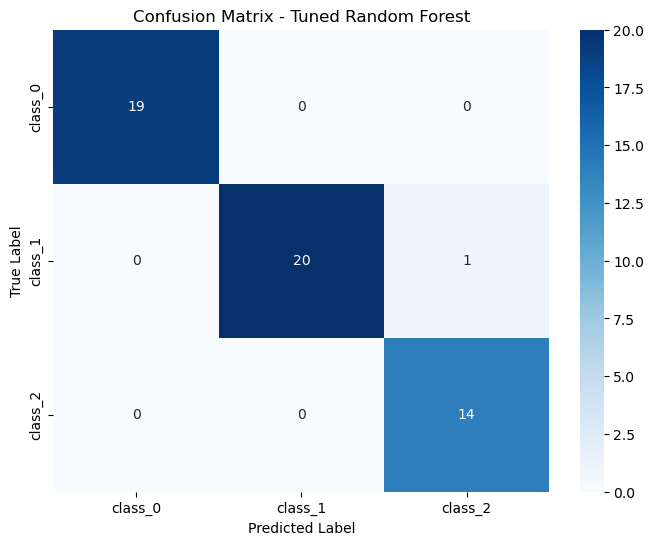

In [21]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
# Display classification report
print("\nClassification Report for Tuned Model:\n", classification_report(y_test, y_pred_best, target_names=wine.target_names))


Classification Report for Tuned Model:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

